## Functional Tests for Suftware
Skeleton code on which functional tests are performed

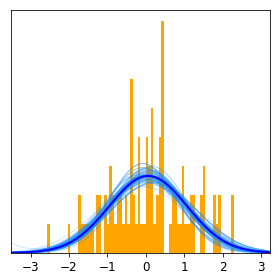

In [55]:
# Standard modules
import numpy as np
import sys

# Import suftware 
sys.path.append('../../')
import suftware as sw

# Generate datas
np.random.seed(0)
data = np.random.randn(100)

# simple test
sw.Density(data).plot() 
global_mistake = []

global_test_counter = 0
# helper method for displaying pass/fail status
def display_status():
    if(global_mistake):
        get_ipython().run_cell_magic(u'HTML', u'', u'<font size=6 color=red><b>FAIL</b></font>')
    else:
        get_ipython().run_cell_magic(u'HTML', u'', u'<font size=6 color=green><b>PASS</b></font>')

## grid Tests:

In [68]:
# values to be tested: fail list expected to cause failure
# successlist expected to pass
grid_fail_list = [5,'x',set(np.linspace(-3,3,100)),np.linspace(-3,3,5),
                      np.linspace(-3,3,1001),np.linspace(-1E-6,1E-6,100),
                     np.linspace(-1E6,1E6,100)]

grid_success_list = [None,np.linspace(-3,3,100),np.linspace(-3,3,100).T,np.matrix(np.linspace(-3,3,100)),
                    np.matrix(np.linspace(-3,3,100).T),list(np.linspace(-3,3,100)),np.linspace(-3,3,6),
                    np.linspace(-3,3,100),np.linspace(-3,3,100),np.linspace(-3,3,1000)]    

# Should fail
for i in range(len(grid_fail_list)):
    functional_test = sw.Density(data,grid = grid_fail_list[i],should_fail=True)
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global_test_counter+=1
    
# Should work
for i in range(len(grid_success_list)):
    functional_test = sw.Density(data,grid=grid_success_list[i],should_fail=False)
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global_test_counter+=1

display_status()    

Error, as expected: type(grid) = <class 'int'>; must be a list or np.ndarray
Error, as expected: type(grid) = <class 'str'>; must be a list or np.ndarray
Error, as expected: type(grid) = <class 'set'>; must be a list or np.ndarray
Error, as expected: len(grid) = 5; must have 6 <= len(grid) <= 1000.
Error, as expected: len(grid) = 1001; must have 6 <= len(grid) <= 1000.
Error, as expected: Histogram has 0 nonempty bins; must be > 3.
Error, as expected: Histogram has 2 nonempty bins; must be > 3.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


## grid_spacing Tests

In [69]:
# grid_spacing

# values to be tested
grid_spacing_fail_list = [0,0.0,-0.1,'0.1',[0.1],0.0001,1000.0]
grid_spacing_success_list = [None,0.02,0.1,0.5]

# should fail
for i in range(len(grid_spacing_fail_list)):
    functional_test = sw.Density(data, grid_spacing=grid_spacing_fail_list[i], should_fail=True)
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global_test_counter+=1
    
# should work    
for i in range(len(grid_spacing_success_list)):
    functional_test = sw.Density(data, grid_spacing=grid_spacing_success_list[i], should_fail=False)
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global_test_counter+=1
    
display_status()    

Error, as expected: grid_spacing = 0.000000; must be > 0.
Error, as expected: grid_spacing = 0.000000; must be > 0.
Error, as expected: grid_spacing = -0.100000; must be > 0.
Error, as expected: type(grid_spacing) = <class 'str'>; must be a number
Error, as expected: type(grid_spacing) = <class 'list'>; must be a number
Error, as expected: Using grid_spacing = 0.000100 produces num_grid_points = 67518, which is too big. Increase grid_spacing or do not set.
Error, as expected: Using grid_spacing = 1000.000000 produces num_grid_points = 0, which is too small. Reduce grid_spacing or do not set.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


## bounding_box Tests:

In [73]:
# bounding_box

bbox_fail_list = [{-6, 6},6,[6],[-6, 0, 6],['-6', '6'],[6, 6],[-1E-6, 1E-6],[-1E6, 1E6],[10, 20]]
bbox_success_list = [[-6, 6],(-6, 6),np.array([-6, 6]),[-.1, .1],[-10, 10]]

# should fail
for i in range(len(bbox_fail_list)):
    functional_test = sw.Density(data, bounding_box=bbox_fail_list[i], should_fail=True)
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global_test_counter+=1
    
# should work    
for i in range(len(bbox_success_list)):
    functional_test = sw.Density(data, bounding_box=bbox_success_list[i], should_fail=False)
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global_test_counter+=1

display_status()

Error, as expected: type(bounding_box) = <class 'set'>; must be one of (<class 'list'>, <class 'tuple'>, <class 'numpy.ndarray'>)
Error, as expected: type(bounding_box) = <class 'int'>; must be one of (<class 'list'>, <class 'tuple'>, <class 'numpy.ndarray'>)
Error, as expected: len(bounding_box) = 1; must be 2
Error, as expected: len(bounding_box) = 3; must be 2
Error, as expected: bounding_box = ['-6', '6']; entries must be numbers
Error, as expected: bounding_box = [6, 6]; entries must be sorted
Error, as expected: Histogram has 0 nonempty bins; must be > 3.
Error, as expected: Histogram has 2 nonempty bins; must be > 3.
Error, as expected: Histogram has 0 nonempty bins; must be > 3.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.
Success, as expected.


## num_grid_points Tests

In [74]:
# num_grid_points

num_grid_points_fail_list = [-10,-1,0,1,2,3,4,5,1001] 
num_grid_points_success_list = [6,100,1000]

# should fail
for i in range(len(num_grid_points_fail_list)):
    functional_test = sw.Density(data, num_grid_points=num_grid_points_fail_list[i], should_fail=True)
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global_test_counter+=1
    
# should work    
for i in range(len(num_grid_points_success_list)):
    functional_test = sw.Density(data, num_grid_points=num_grid_points_success_list[i], should_fail=False)
    global_mistake = functional_test.mistake
    if global_mistake is True:
        display_status()
        sys.exit(1)
    global_test_counter+=1

display_status()


Error, as expected: num_grid_points = -10; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = -1; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 0; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 1; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 2; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 3; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 4; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 5; must have 6 <= num_grid_poitns <= 1000.
Error, as expected: num_grid_points = 1001; must have 6 <= num_grid_poitns <= 1000.
Success, as expected.
Success, as expected.
Success, as expected.
